# Diabetes disease Progression prediction

In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [103]:
df=load_diabetes()

In [104]:
df.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [105]:
a=df.feature_names

In [106]:
data=pd.DataFrame(data=df.data,columns=df.feature_names)

In [107]:
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [108]:
data['DiseaseProgression']=df.target

In [109]:
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,DiseaseProgression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [110]:
data.isnull().sum()

age                   0
sex                   0
bmi                   0
bp                    0
s1                    0
s2                    0
s3                    0
s4                    0
s5                    0
s6                    0
DiseaseProgression    0
dtype: int64

In [111]:
data.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,DiseaseProgression
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [112]:
data.keys()

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'DiseaseProgression'],
      dtype='object')

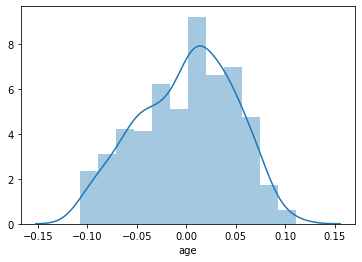

In [113]:
sns.distplot(data['age'])

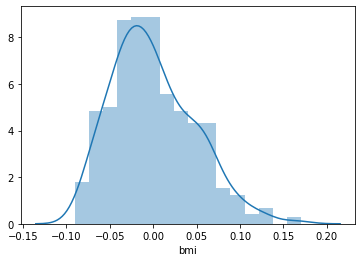

In [114]:
sns.distplot(data['bmi'])

<Figure size 1152x720 with 0 Axes>

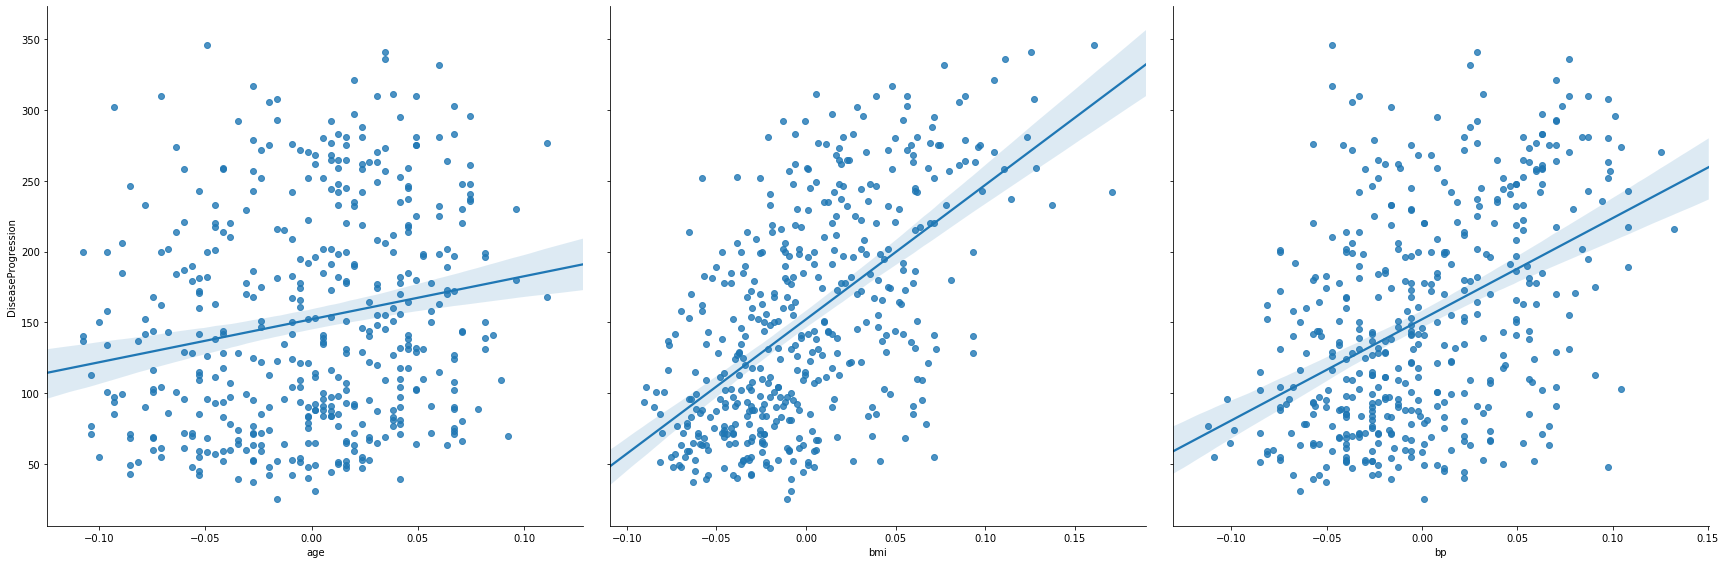

In [132]:
plt.figure(figsize=(16,10))
sns.pairplot(data,x_vars=['age','bmi','bp'],y_vars=['DiseaseProgression'],kind='reg',size=8.0)

In [115]:
x=data.iloc[:,data.columns!='DiseaseProgression'].values

In [116]:
y=data.iloc[:,data.columns=='DiseaseProgression'].values

In [117]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=0)

In [118]:
x_test.shape

(111, 10)

In [119]:
y_test.shape

(111, 1)

In [120]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(x_train,y_train)
y_pred=model1.predict(x_test)
intercept=model1.intercept_
print(intercept)
print('\n')
coefficient=model1.coef_.flatten()
print(coefficient)
df1=pd.DataFrame([df.feature_names,coefficient])
df1

[153.06798218]


[ -43.26774487 -208.67053951  593.39797213  302.89814903 -560.27689824
  261.47657106   -8.83343952  135.93715156  703.22658427   28.34844354]


,0,1,2,3,4,5,6,7,8,9
0,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
1,-43.2677,-208.671,593.398,302.898,-560.277,261.477,-8.83344,135.937,703.227,28.3484


In [121]:
a={'ACTUAL VALUES':y_test.flatten(),'PREDICTED':y_pred.flatten()}
df2=pd.DataFrame(a)
df2

,ACTUAL VALUES,PREDICTED
0,321.0,241.847303
1,215.0,250.123039
2,127.0,164.964565
3,64.0,119.116393
4,175.0,188.231203
5,275.0,260.560794
6,179.0,113.075838
7,232.0,190.541175
8,142.0,151.888375
9,99.0,236.508484


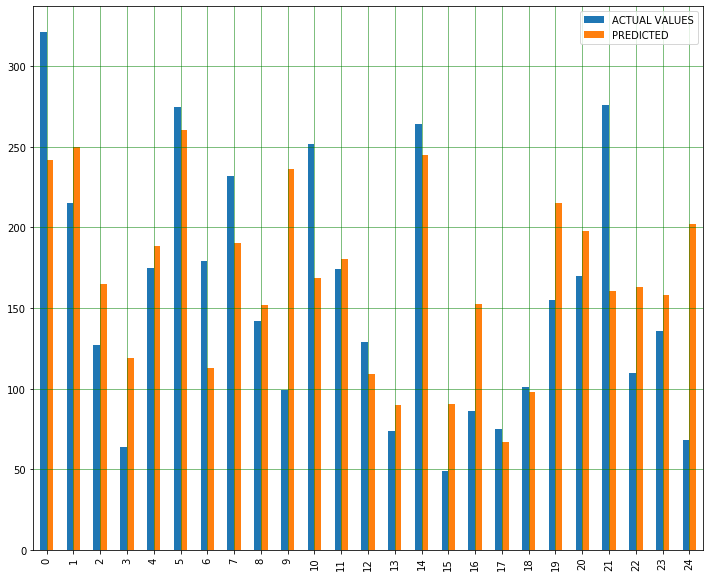

In [122]:
"""visualize comparison result as a bar graph"""
df3=df2.head(25)
df3.plot(kind='bar',figsize=(12,10))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.show()

In [123]:
print('MEAN ABSOLUTE ERROR:',mean_absolute_error(y_test,y_pred))
print('MEAN SQUARED ERROR:',mean_squared_error(y_test,y_pred))
print('ROOT MEAN SQUARED ERROR:',np.sqrt(mean_squared_error(y_test,y_pred)))

MEAN ABSOLUTE ERROR: 45.120987683251
MEAN SQUARED ERROR: 3180.1988368427274
ROOT MEAN SQUARED ERROR: 56.393251695949644
